 <h1 style="text-align: center;"> SALES PREDICTION USING PYTHON </h1>

## Table of Contents
   Introduction<br>
   Objective<br>
1. Data Preprocessing and Analysis<br>
2. Exploratory Data Analysis<br>
3. Building Models<br>
    3.1 Train-Test Split<br>
    3.2 Normalisation<br>
    3.2 Models <br>
    3.2.1 Linear Regression<br>
    3.2.2 Lasso Regression <br>
    3.2.3 Decision Tree <br>
    3.2.4 Random Forest <br>
4. Model Evaluation<br>
5. Conclusion


## Introduction

**This project focuses on predicting sales based on advertising expenditures using machine learning techniques. The dataset includes costs for TV, radio, and newspapers, along with corresponding sales figures. Our goal is to develop and evaluate various regression models to determine the most accurate predictor of sales.**

**This project applies and compare models such as Linear Regression, Lasso Regression, Decision Tree, and Random Forest. By analyzing performance metrics like Mean Squared Error (MSE) and R-squared (R²), we aim to optimize advertising strategies and improve decision-making for maximizing sales potential.**


In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
os.chdir("C://Users//Shashank Rawat//Desktop//python//codesoft//Sales Prediction using Python")
os.getcwd()

'C:\\Users\\Shashank Rawat\\Desktop\\python\\codesoft\\Sales Prediction using Python'

## 1. Data Preprocessing : 

In [4]:
data=pd.read_csv('advertising.csv')

In [5]:
df=data.copy()

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.shape

(200, 4)

**Dataset contains 4 Vriables and 200 record.** 

In [8]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [9]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

**We have our dataset with three categories of advertising expenditures (TV, radio, and newspaper) along with the associated sales figures (in thousands)**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
# Checking for missing values is dataset
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Dataset has no missing values in dataset**

In [12]:
# statistical Description in dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [13]:
# Checking for the duplicates
df.duplicated().sum()

0

**There are no duplicate observation in the dataset.**

## 2. Exploratory Data Analysis :

<AxesSubplot:xlabel='Sales', ylabel='Count'>

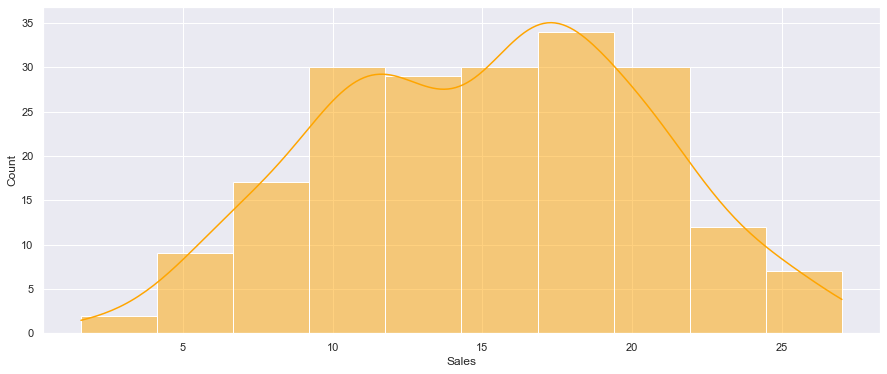

In [14]:
# Histogram of Target variable
plt.figure(figsize=(15,6))
sns.histplot(data=df,x=df['Sales'],kde=True,color="ORANGE")

**Our Target variable "Sales" is almost normally distributed.**

<Figure size 720x720 with 0 Axes>

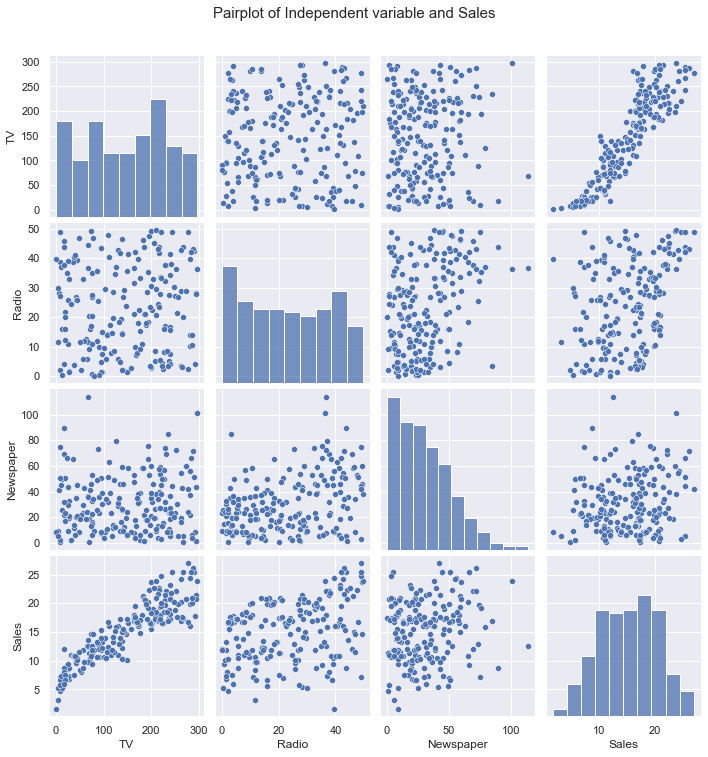

In [15]:
# pairplot of the variables
plt.figure(figsize=(10, 10))
sns.pairplot(df)
plt.suptitle("Pairplot of Independent variable and Sales", y=1.05, fontsize=15, ha='center')
plt.show()

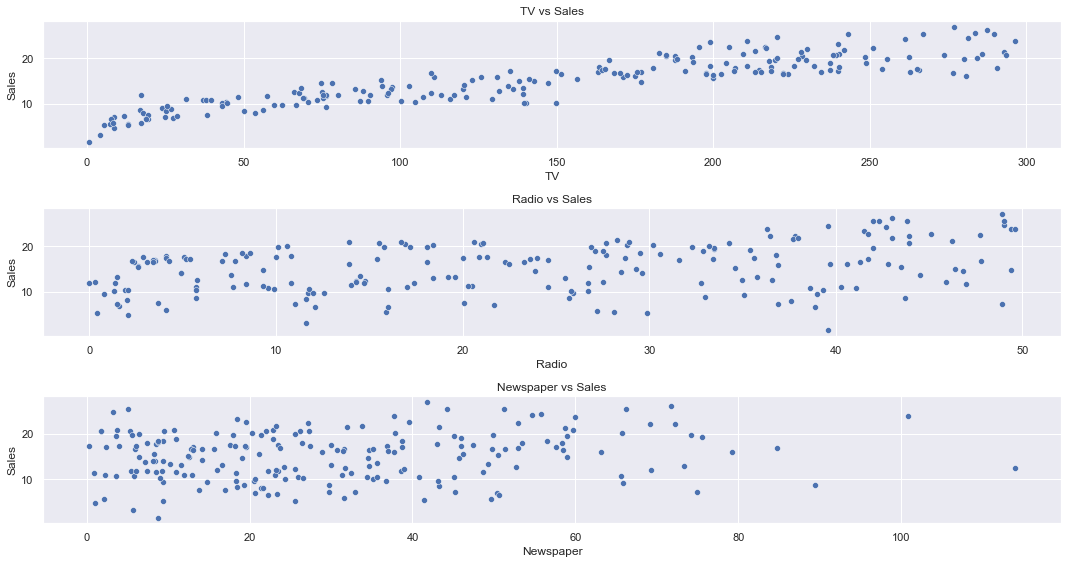

In [16]:
# Scatter plot for target variable and independent variables
plt.figure(figsize=(15,8))
# Loop through each advertising expenditure column
for i, col in enumerate(['TV', 'Radio', 'Newspaper']):
    plt.subplot(3, 1, i + 1) 
    sns.scatterplot(data=df, x=col, y='Sales')
    plt.title(f'{col} vs Sales')
    plt.xlabel(col)
    plt.ylabel('Sales')


plt.tight_layout()
plt.show()

**Sales show a stronger correlation with TV advertising than with Radio or Newspaper, indicating that TV advertising has a more significant impact on Sales.**

<AxesSubplot:>

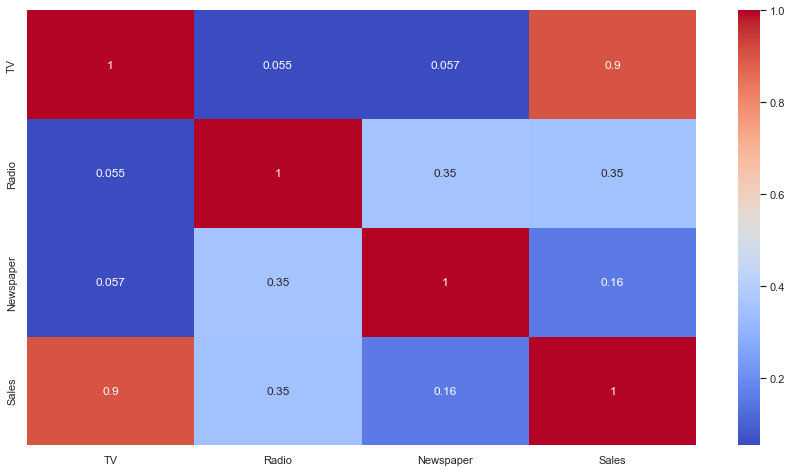

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')

**TV advertising expenditures exhibit a strong positive linear correlation with sales.**

## 3. Model Building :

In [18]:
# importing required libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 3.1 Train-Test Split :

In [19]:
# splitting Target and independent variables.
X= np.array(df.drop('Sales', axis=1))
y= np.array(df['Sales']).reshape(-1, 1)
print(X.shape)
print(y.shape)

(200, 3)
(200, 1)


In [20]:
# Traint test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

### 3.2 Normalisation :  

In [21]:
# Normalising Independent Variables 
scale = StandardScaler()

Scaled_X_train= scale.fit_transform(X_train)
Scaled_X_test = scale.transform(X_test)

### 3.3 Models : 

#### 3.3.1 Linear Regression :

In [22]:
# Building Model
Linear_regression_model = LinearRegression()
Linear_regression_model.fit(Scaled_X_train,y_train)

# predicting on the test dataset.
y_test_pred_LR = Linear_regression_model.predict(Scaled_X_test)

# Mean square Error
mse_LR = mean_squared_error(y_test,y_test_pred_LR)
print(f"Mean Square Error: {mse_LR:.2f}")

# R-Square Score 
r2_LR = r2_score(y_test,y_test_pred_LR)
print(f"R-Square Score: {r2_LR:.2f}")

Mean Square Error: 3.35
R-Square Score: 0.83


#### 3.3.2 Lasso - Regression :

In [23]:
# Initialize the Lasso model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(Scaled_X_train, y_train)

# Make predictions on the test set
y_test_pred_lasso = lasso_model.predict(Scaled_X_test)

# Calculate Mean Squared Error and R-squared
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Mean Squared Error: {mse_lasso:.2f}")
print(f"R-squared: {r2_lasso:.2f}")

Mean Squared Error: 5.25
R-squared: 0.73


#### 3.3.3 Decision Tree Rgressor :

In [24]:
# Initialize the model
decision_tree_model = DecisionTreeRegressor(random_state=10)
decision_tree_model.fit(Scaled_X_train, y_train)

# Make predictions on the test set
y_pred_DT = decision_tree_model.predict(Scaled_X_test)

mse_DT = mean_squared_error(y_test, y_pred_DT)
r2_DT = r2_score(y_test, y_pred_DT)

print(f"Mean Squared Error (MSE): {mse_DT:.2f}")
print(f"R-squared score: {r2_DT:.2f}")


Mean Squared Error (MSE): 1.76
R-squared score: 0.91


#### 3.3.4 Random Froest : 

In [25]:
# Initialize the model
random_forest_model = RandomForestRegressor(random_state=10)
random_forest_model.fit(Scaled_X_train, y_train)

# Make predictions on the test set
y_pred_RF = random_forest_model.predict(Scaled_X_test)

# Calculate Mean Squared Error (MSE)
mse_RF= mean_squared_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)

print(f"Mean Squared Error (MSE): {mse_RF:.2f}")
print(f"R-squared score: {r2_RF:.2f}")

Mean Squared Error (MSE): 1.09
R-squared score: 0.94


#### Creating Evaluation Dataframe : 

In [26]:
Evaluation_Df = pd.DataFrame({
    'Model': ['Linear Regression','Lasso Regression','Decision Tree','Random Forest'],
    'Mean Squared Error (MSE)': [mse_LR,mse_lasso,mse_DT,mse_RF],
    'R-squared score (R2)': [r2_LR*100,mse_lasso*100,r2_DT*100,r2_RF*100]
})
Evaluation_Df

,Model,Mean Squared Error (MSE),R-squared score (R2)
0,Linear Regression,3.350989,82.966906
1,Lasso Regression,5.250221,525.022144
2,Decision Tree,1.763250,91.037391
3,Random Forest,1.085544,94.482174


## 4. Model Evaluation :

In this analysis, we evaluate and compare four different regression models based on their performance metrics: Mean Squared Error (MSE) and R-squared Score (R²). The models considered are Linear Regression, Lasso Regression, Decision Tree, and Random Forest.

### Evaluation Metrics

| Model              | Mean Squared Error (MSE) | R-squared Score (R²) |
|--------------------|---------------------------|----------------------|
| Linear Regression | 3.350989                  | 82.97%               |
| Lasso Regression   | 5.250221                  | 52.50%               |
| Decision Tree      | 1.763250                  | 91.04%               |
| Random Forest      | 1.085544                  | 94.48%               |


### Detailed Analysis

### 1. Linear Regression
- **MSE**: 3.35
- **R²**: 82.97%

  **Analysis**:
  The Linear Regression model exhibits a high MSE, indicating larger average prediction errors, and its R² score of 82.97% suggests it explains a significant portion of the variance in the target variable, though not the highest among the models tested.

### 2. Lasso Regression
- **MSE**: 5.25
- **R²**: 52.50%

  **Analysis**:Lasso Regression shows the highest MSE, indicating the largest prediction errors, and its R² score of 52.50% is the lowest, meaning it explains only half of the variance. Excessive regularization may be causing underfitting by driving many coefficients to zero.

### 3. Decision Tree
- **MSE**: 1.76
- **R²**: 91.04%

  **Analysis**:The Decision Tree model has a lower MSE than Linear and Lasso Regression, indicating better predictive accuracy. Its R² score of 91.04% shows it explains a high proportion of the variance, reflecting a strong fit to the data

### 4. Random Forest
- **MSE**: 1.08
- **R²**: 94.48%

  **Analysis**:The Random Forest model has the lowest MSE, indicating the smallest prediction errors and best performance. With the highest R² score of 94.48%, it explains the most variance in the target variable, making it the most effective at capturing data patterns

### Best Model :
**Random Forest is identified as the best model based on the evaluation metrics. It has the lowest MSE (1.08) and the highest R² score (94.48%), indicating both the best predictive accuracy and the best fit to the data among the models tested.**



## 5. Conclusion : 

**In this project, we developed and evaluated multiple regression models to predict sales based on advertising expenditures. After a comprehensive analysis, the Random Forest model emerged as the most effective, demonstrating the lowest Mean Squared Error (MSE) and the highest R-squared score (R²), indicating superior predictive accuracy and the best fit to the data.**